Objective: Analyze car sales data using charts.

You’re an up-and-coming data analyst at a major car company, tasked with analyzing car sales data. Using charts and graphs, you need to show which car models are the top sellers and how sales are distributed. Your insights could shape the company’s next big move in the market!

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Load the dataset (update filename if needed)
df = pd.read_csv("/content/Car_sales.csv")

# Inspect the dataset
print(df.head())

# Check for missing values
df.dropna(inplace=True)






  Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0        Acura  Integra              16.919               16.360    Passenger   
1        Acura       TL              39.384               19.875    Passenger   
2        Acura       CL              14.114               18.225    Passenger   
3        Acura       RL               8.588               29.725    Passenger   
4         Audi       A4              20.397               22.255    Passenger   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0               21.50          1.8       140.0      101.2   67.3   172.4   
1               28.40          3.2       225.0      108.1   70.3   192.9   
2                 NaN          3.2       225.0      106.9   70.6   192.0   
3               42.00          3.5       210.0      114.6   71.4   196.6   
4               23.99          1.8       150.0      102.6   68.2   178.0   

   Curb_weight  Fuel_capacity  Fuel_efficiency Latest_La

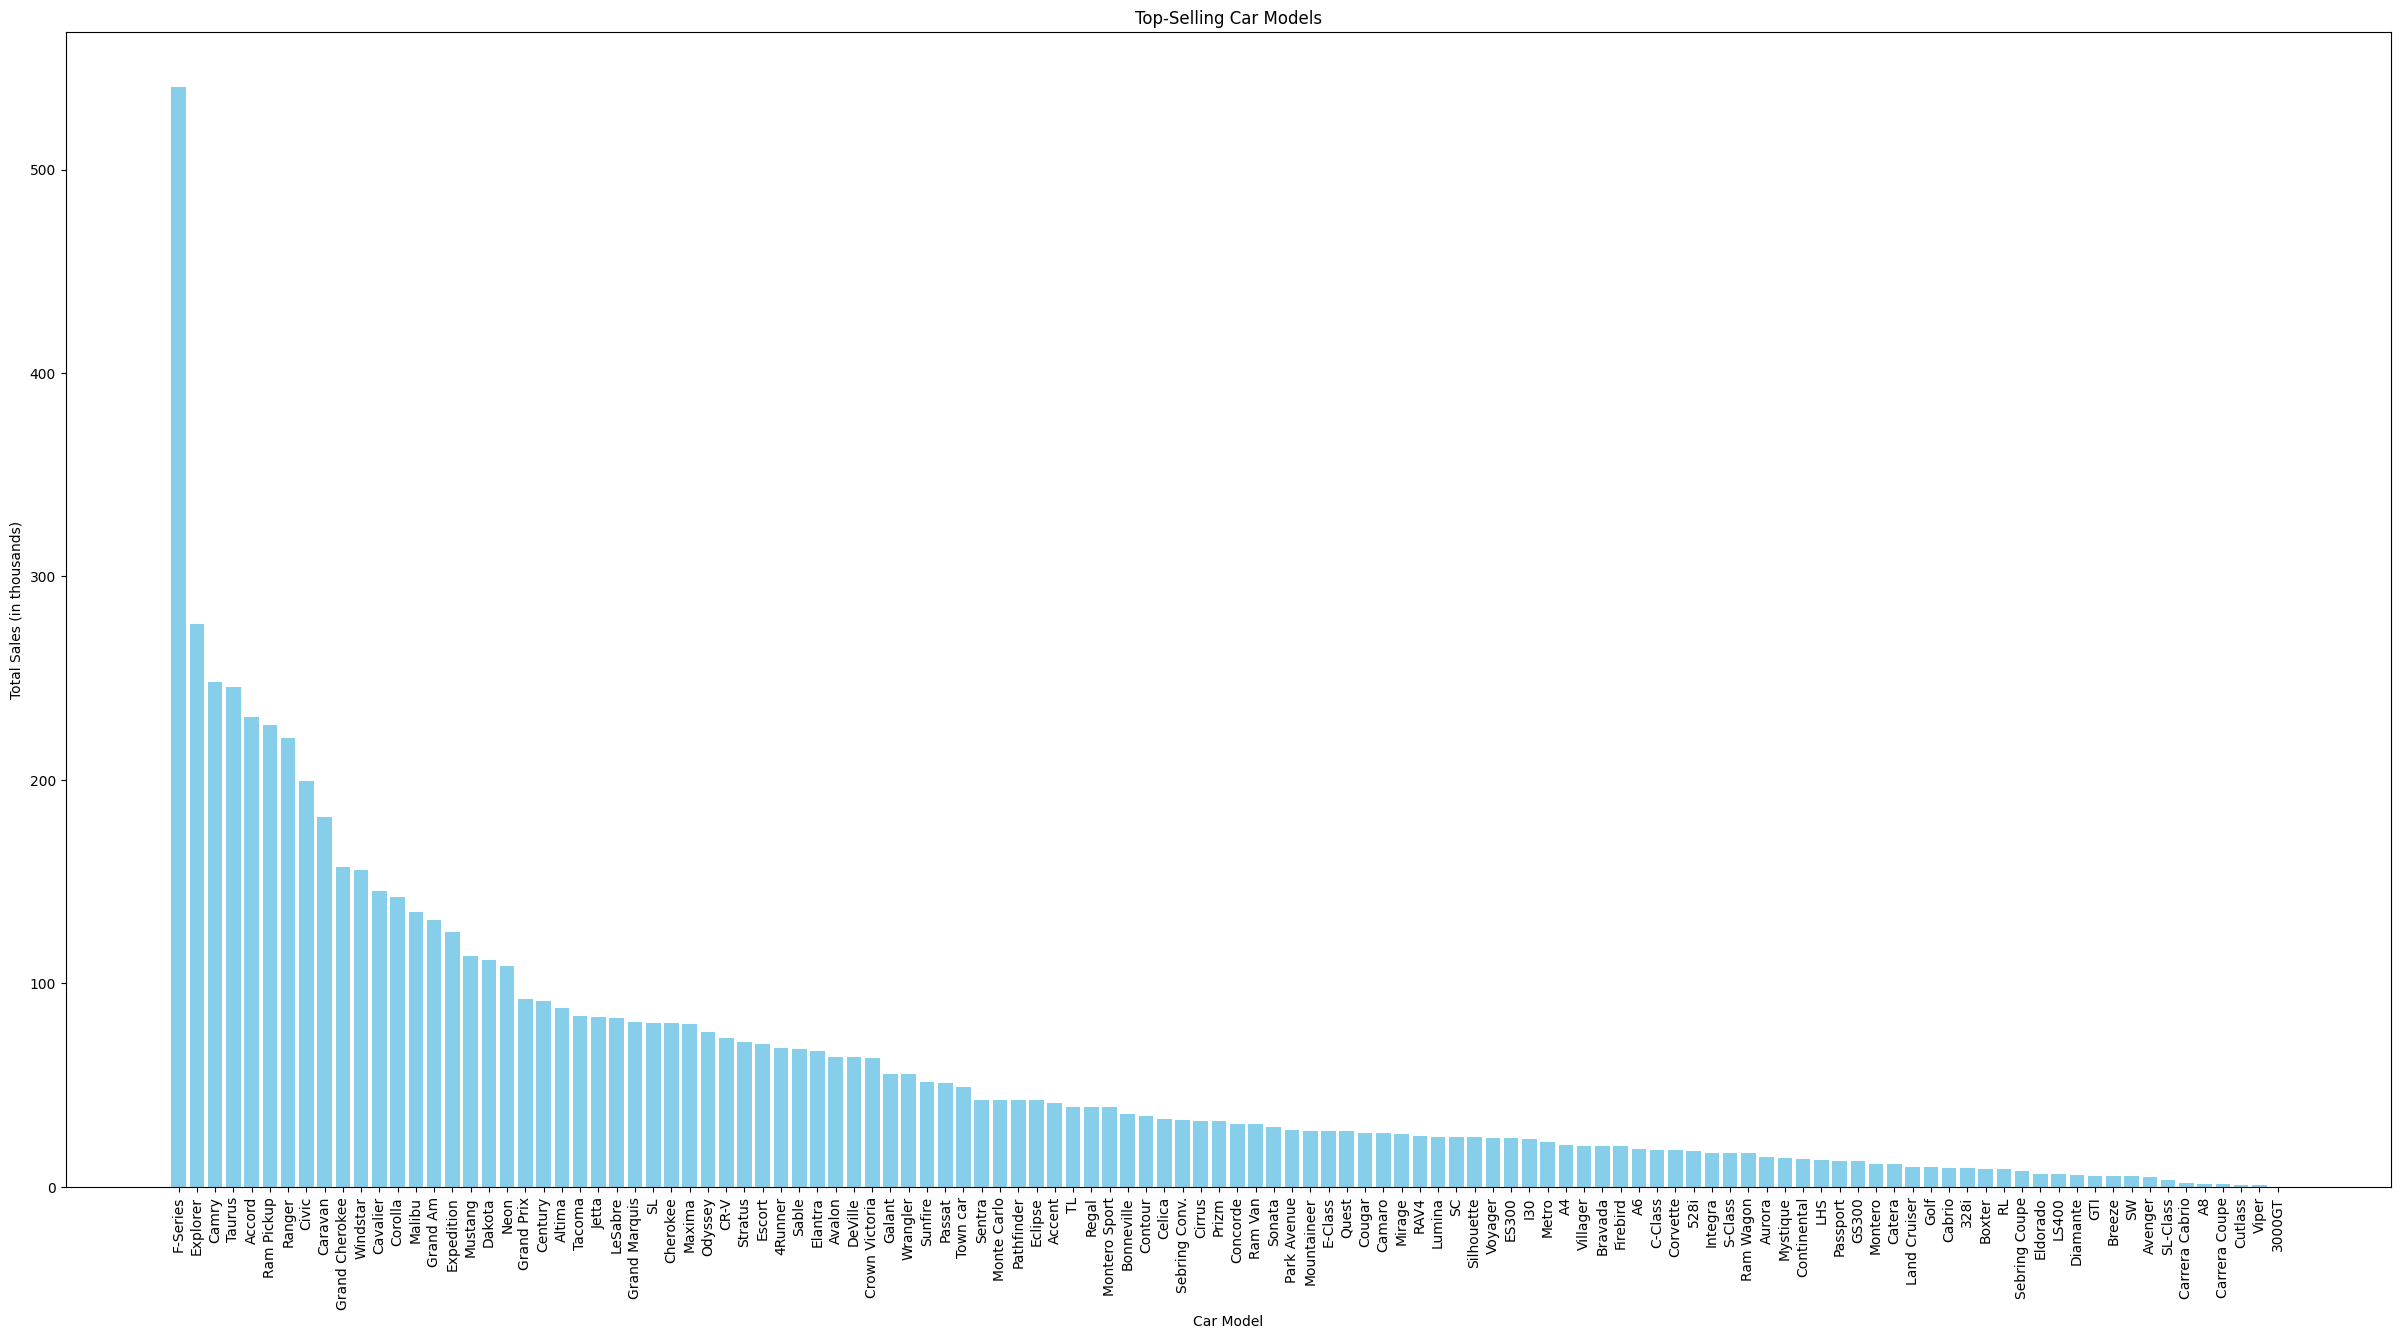

In [34]:
# Bar Chart - Sales by Car Model
model_sales = df.groupby("Model")["Sales_in_thousands"].sum().reset_index()
model_sales = model_sales.sort_values(by="Sales_in_thousands", ascending=False)
plt.figure(figsize=(30, 15))
plt.bar(model_sales["Model"], model_sales["Sales_in_thousands"], color='skyblue')
plt.xlabel("Car Model")
plt.ylabel("Total Sales (in thousands)")
plt.title("Top-Selling Car Models")
plt.xticks(rotation=90)
plt.show()


In [32]:
# Pie Chart - Sales by Manufacturer
manufacturer_sales = df.groupby("Manufacturer")["Sales_in_thousands"].sum().reset_index()
fig = px.pie(manufacturer_sales, names="Manufacturer", values="Sales_in_thousands", title="Car Sales Distribution by Manufacturer", width=800, height=600)
fig.show()

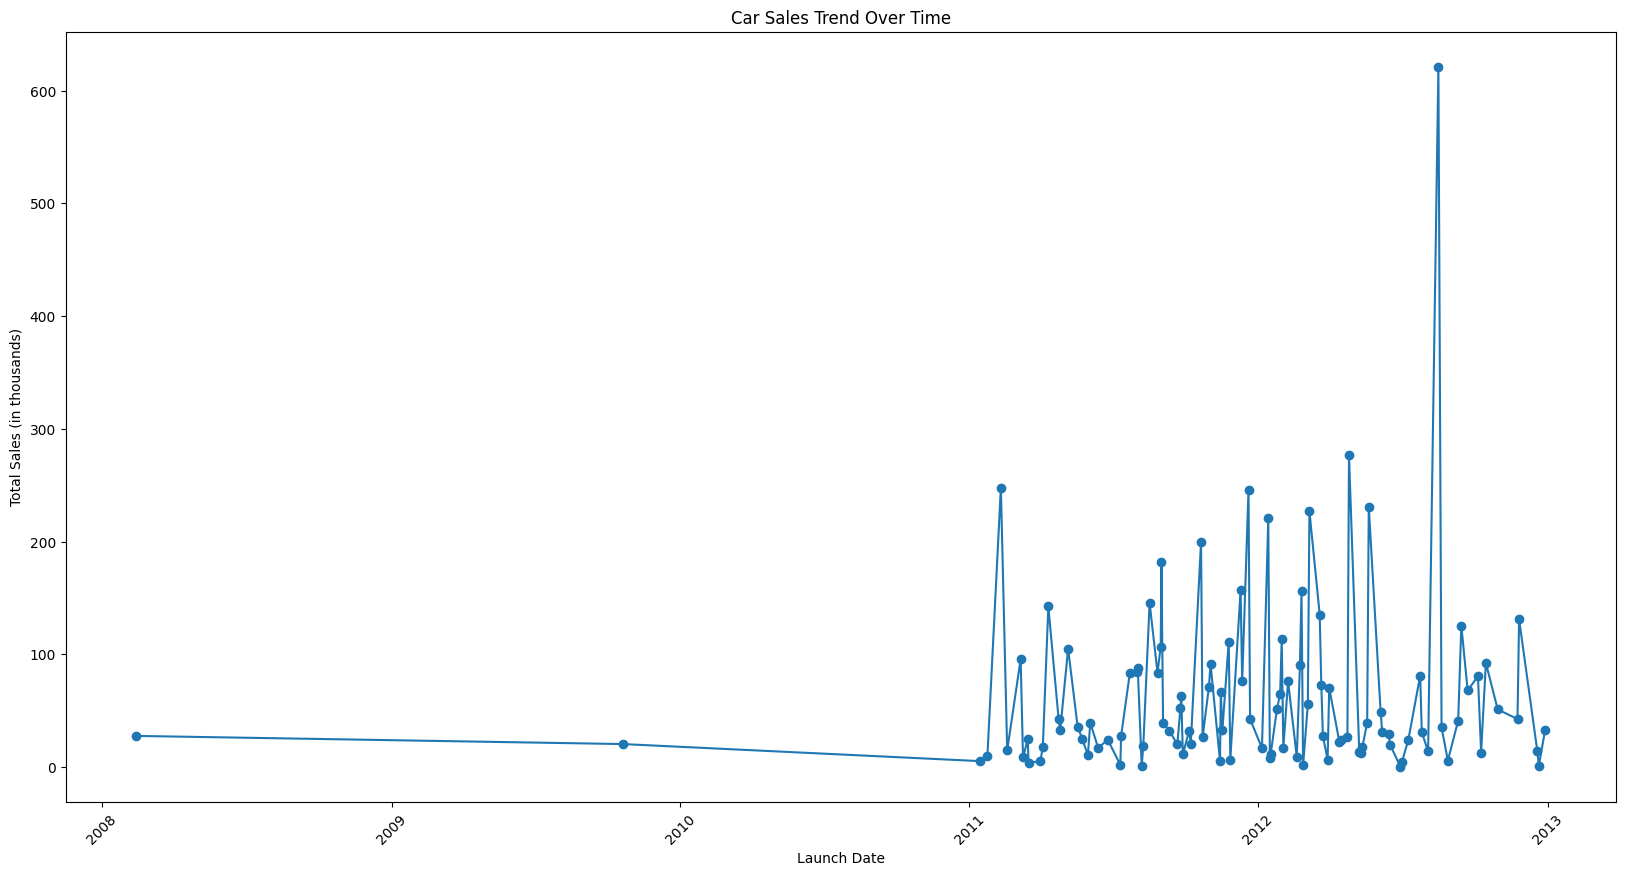

In [36]:

# Line Chart - Sales Trend Over Time (if Latest_Launch is available)
df["Latest_Launch"] = pd.to_datetime(df["Latest_Launch"], errors='coerce')
time_sales = df.groupby("Latest_Launch")["Sales_in_thousands"].sum().reset_index()
plt.figure(figsize=(20, 10))
plt.plot(time_sales["Latest_Launch"], time_sales["Sales_in_thousands"], marker='o', linestyle='-')
plt.xlabel("Launch Date")
plt.ylabel("Total Sales (in thousands)")
plt.title("Car Sales Trend Over Time")
plt.xticks(rotation=45)
plt.show()

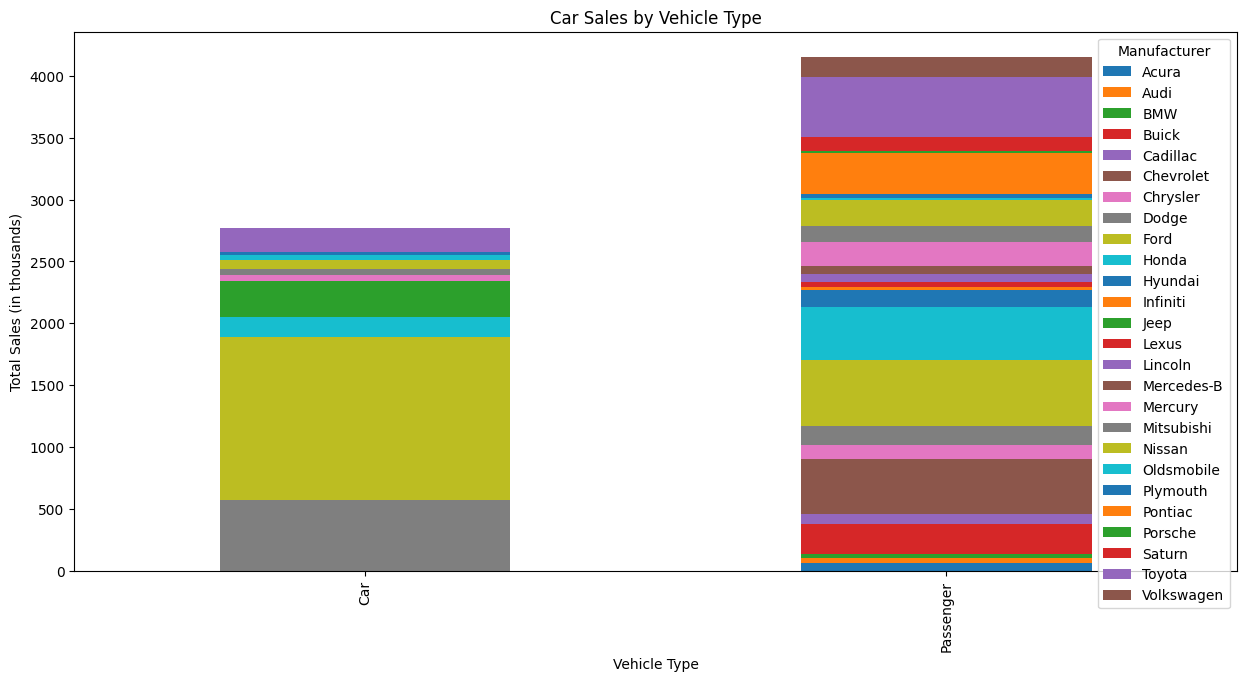

In [37]:


# Stacked Bar Chart - Sales by Vehicle Type
vehicle_sales = df.groupby(["Vehicle_type", "Manufacturer"])["Sales_in_thousands"].sum().unstack()
vehicle_sales.plot(kind="bar", stacked=True, figsize=(15, 7))
plt.xlabel("Vehicle Type")
plt.ylabel("Total Sales (in thousands)")
plt.title("Car Sales by Vehicle Type")
plt.legend(title="Manufacturer")
plt.show()


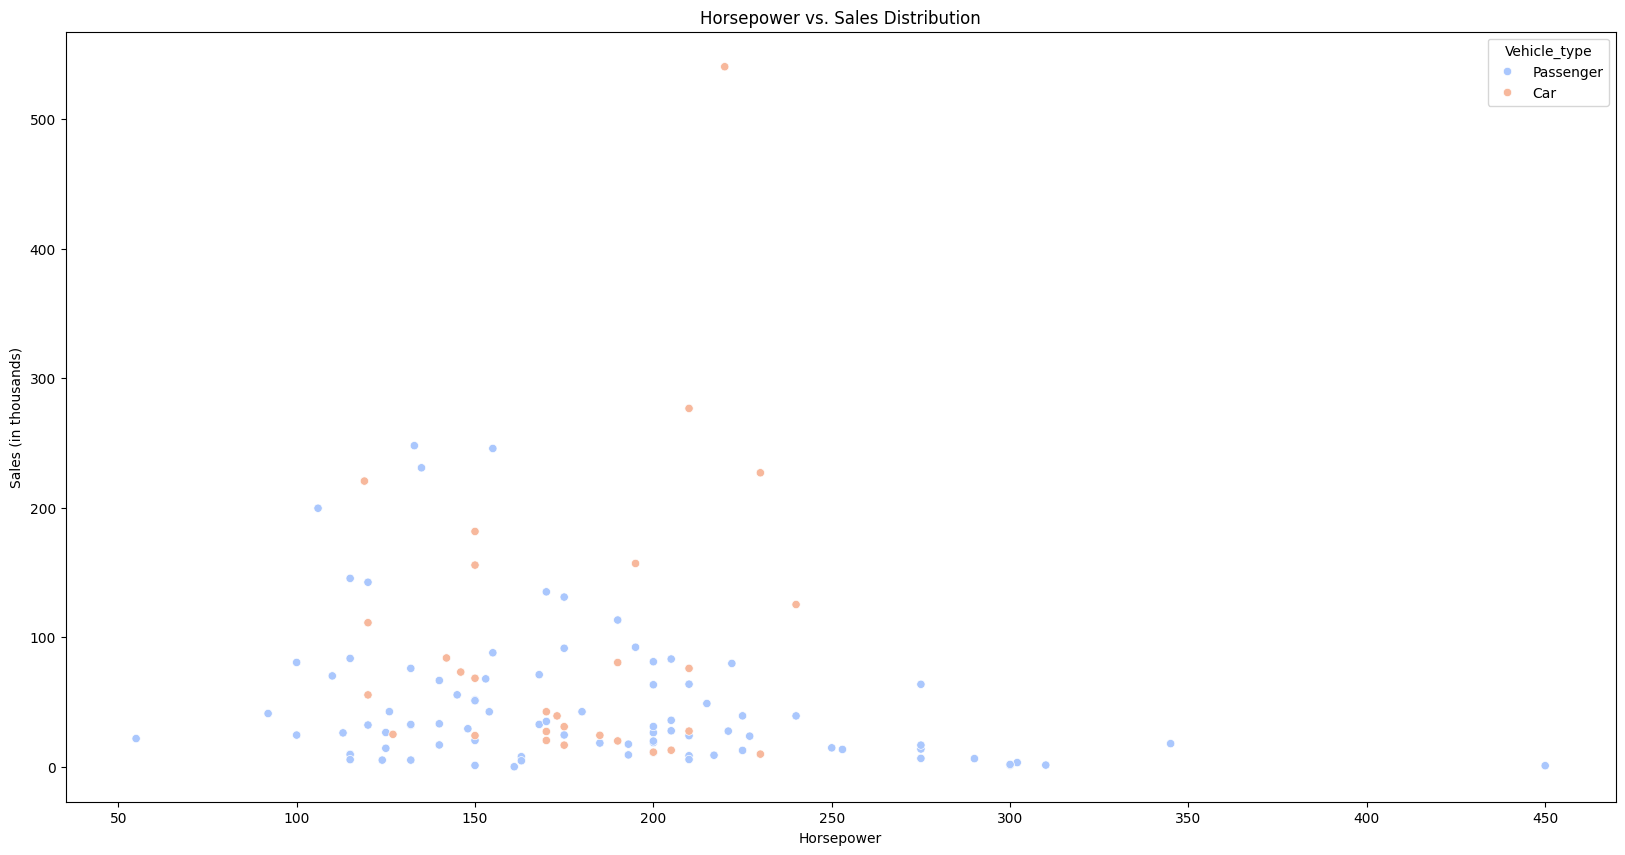

In [38]:

# Scatter Plot - Horsepower vs. Sales
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="Horsepower", y="Sales_in_thousands", hue="Vehicle_type", palette="coolwarm")
plt.xlabel("Horsepower")
plt.ylabel("Sales (in thousands)")
plt.title("Horsepower vs. Sales Distribution")
plt.show()

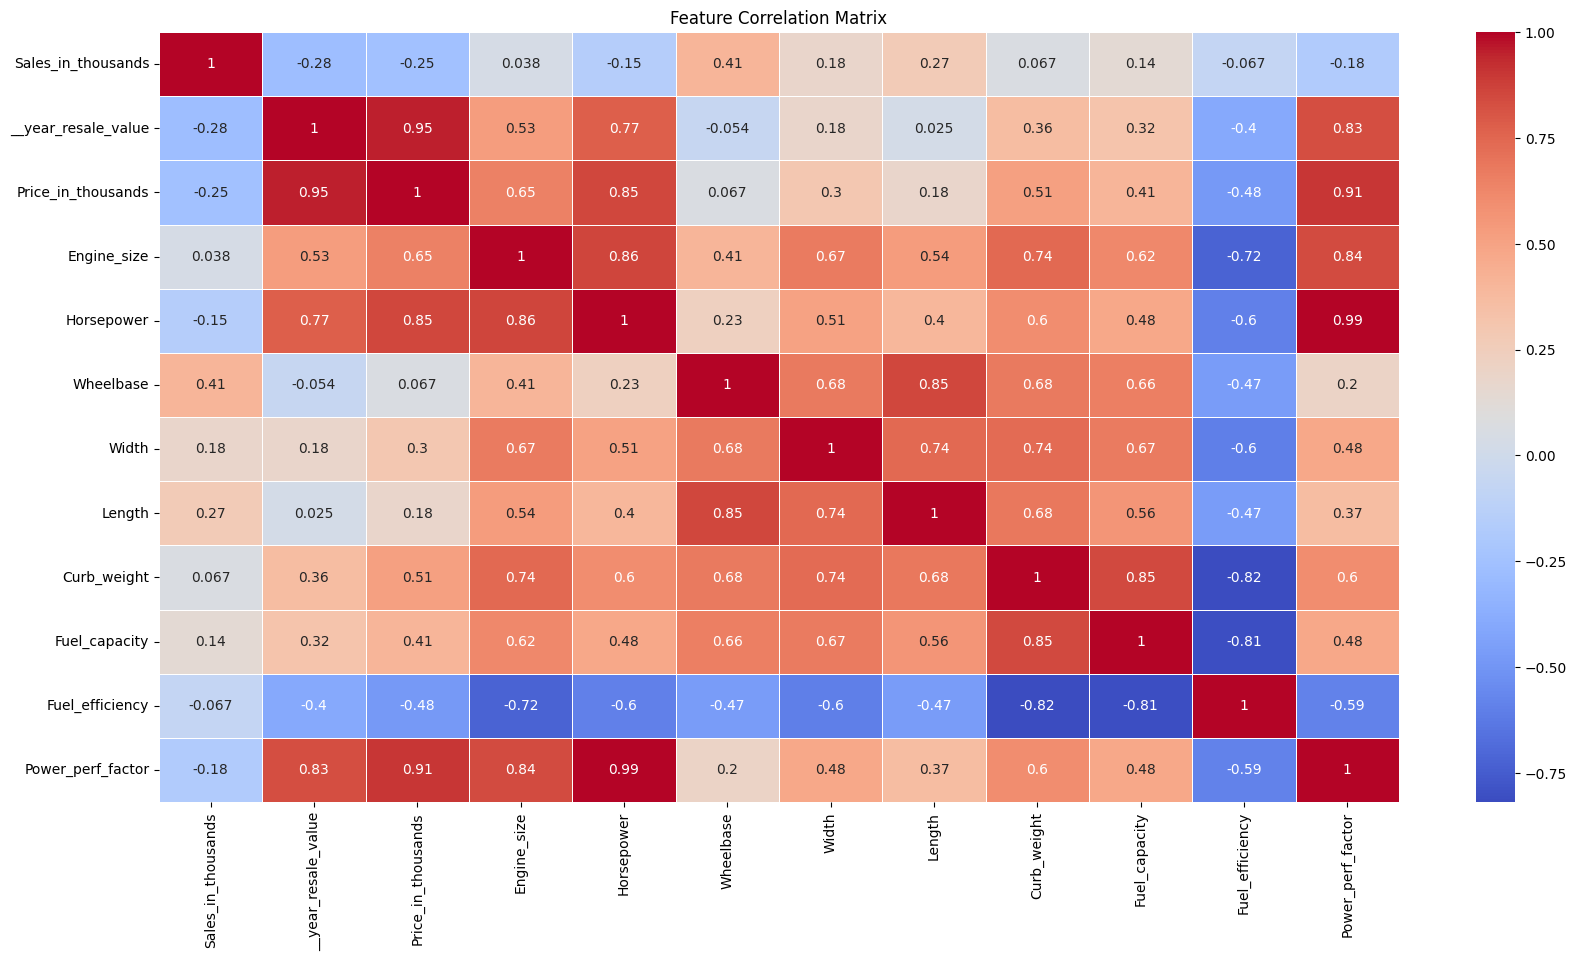

In [39]:

# Heatmap - Correlation Matrix
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()
